In [1]:
'''
【项目04】  视频网站数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、数据清洗 - 时间标签转化
要求：
① 将时间字段改为时间标签
② 创建函数
提示：
需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24

3、问题1 分析出不同导演电影的好评率，并筛选出TOP20
要求：
① 计算统计出不同导演的好评率，不要求创建函数
② 通过多系列柱状图，做图表可视化
提示：
① 好评率 = 好评数 / 评分人数
② 可自己设定图表风格

4、问题2 统计分析2001-2016年每年评影人数总量
要求：
① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
② 通过面积图，做图表可视化，分析每年人数总量变化规律
③ 验证是否有异常值（极度异常）
④ 创建函数分析出数据外限最大最小值）
⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
提示：
① 通过箱型图验证异常值情况
② 通过quantile(q=0.5)方法，得到四分位数
③ IQR=Q3-Q1
④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）
⑤ 可自己设定图表风格

'''

'\n【项目04】  视频网站数据清洗整理和结论研究\n\n作业要求：\n1、数据清洗 - 去除空值\n要求：创建函数\n提示：fillna方法填充缺失数据，注意inplace参数\n\n2、数据清洗 - 时间标签转化\n要求：\n① 将时间字段改为时间标签\n② 创建函数\n提示：\n需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24\n\n3、问题1 分析出不同导演电影的好评率，并筛选出TOP20\n要求：\n① 计算统计出不同导演的好评率，不要求创建函数\n② 通过多系列柱状图，做图表可视化\n提示：\n① 好评率 = 好评数 / 评分人数\n② 可自己设定图表风格\n\n4、问题2 统计分析2001-2016年每年评影人数总量\n要求：\n① 计算统计出2001-2016年每年评影人数总量，不要求创建函数\n② 通过面积图，做图表可视化，分析每年人数总量变化规律\n③ 验证是否有异常值（极度异常）\n④ 创建函数分析出数据外限最大最小值）\n⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？\n提示：\n① 通过箱型图验证异常值情况\n② 通过quantile(q=0.5)方法，得到四分位数\n③ IQR=Q3-Q1\n④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）\n⑤ 可自己设定图表风格\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
# 数据读取

data = pd.read_csv('爱奇艺视频数据.csv',engine = 'python')
print(data.head())
print(data.columns)

       数据获取日期   演员  视频ID                                        详细链接  \
0  2016年5月24日  NaN   100  http://www.iqiyi.com/dianshiju/douyu2.html   
1  2016年5月24日  NaN  1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2  2016年5月24日  NaN  1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3  2016年5月24日  NaN  1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4  2016年5月24日  NaN  1756   http://www.iqiyi.com/dianshiju/18jbj.html   

               剧名   状态                     类型 来源平台     整理后剧名 更新时间  ...  \
0     斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2  NaN  ...   
1    江湖兄弟(1-32)全集  已完结  粤语电视剧/悬疑剧/年代剧/超清1080P  爱奇艺    江湖兄弟全集  NaN  ...   
2  肥猫寻亲记2(1-30)全集  已完结           粤语电视剧/家庭剧/喜剧  爱奇艺  肥猫寻亲记2全集  NaN  ...   
3    舞台姐妹(1-34)全集  已完结          粤语电视剧/年代剧/家庭剧  爱奇艺    舞台姐妹全集  NaN  ...   
4   18禁不禁(1-30)全集  已完结   粤语电视剧/偶像剧/超清1080P/喜剧  爱奇艺   18禁不禁全集  NaN  ...   

     上映年份                                                 简介   导演      差评数  \
0  2004.0  在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语

In [4]:
# 数据清洗 - 去除空值

def data_fillna(df):
    cols = data.columns
    for col in cols:
        if df[col].dtype == 'object':
            df[col].fillna('缺失数据',inplace = True)
        else:
            df[col].fillna(0,inplace = True)
    return(df)
data_c = data_fillna(data)
print(data_c)

           数据获取日期                                                 演员  \
0      2016年5月24日                                               缺失数据   
1      2016年5月24日                                               缺失数据   
2      2016年5月24日                                               缺失数据   
3      2016年5月24日                                               缺失数据   
4      2016年5月24日                                               缺失数据   
5      2016年5月24日                                               缺失数据   
6      2016年5月24日                                               缺失数据   
7      2016年5月24日                                               缺失数据   
8      2016年5月24日                                               缺失数据   
9      2016年5月24日                                               缺失数据   
10     2016年5月24日                                               缺失数据   
11     2016年5月24日                                               缺失数据   
12     2016年5月24日                                               

In [5]:
# 数据清洗 - 时间标签转化
# 将时间字段改为时间标签

def data_clean_time(df,*cols):
    for col in cols:
        df[col] = df[col].str.replace('年','-')
        df[col] = df[col].str.replace('月','-')
        df[col] = df[col].str.replace('日','')
        df[col] = pd.to_datetime(df[col])
    return(df)
data_c = data_clean_time(data_c,'数据获取日期')
print(data_c['数据获取日期'].dtype)
print(data_c.head())

datetime64[ns]
      数据获取日期    演员  视频ID                                        详细链接  \
0 2016-05-24  缺失数据   100  http://www.iqiyi.com/dianshiju/douyu2.html   
1 2016-05-24  缺失数据  1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2 2016-05-24  缺失数据  1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3 2016-05-24  缺失数据  1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4 2016-05-24  缺失数据  1756   http://www.iqiyi.com/dianshiju/18jbj.html   

               剧名   状态                     类型 来源平台     整理后剧名  更新时间  ...  \
0     斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2  缺失数据  ...   
1    江湖兄弟(1-32)全集  已完结  粤语电视剧/悬疑剧/年代剧/超清1080P  爱奇艺    江湖兄弟全集  缺失数据  ...   
2  肥猫寻亲记2(1-30)全集  已完结           粤语电视剧/家庭剧/喜剧  爱奇艺  肥猫寻亲记2全集  缺失数据  ...   
3    舞台姐妹(1-34)全集  已完结          粤语电视剧/年代剧/家庭剧  爱奇艺    舞台姐妹全集  缺失数据  ...   
4   18禁不禁(1-30)全集  已完结   粤语电视剧/偶像剧/超清1080P/喜剧  爱奇艺   18禁不禁全集  缺失数据  ...   

     上映年份                                                 简介    导演      差评数  \
0  2004.0  在单子杀了阿豹派去强暴

Text(0.5, 1.0, '不同导演电影好评率Top20\n')

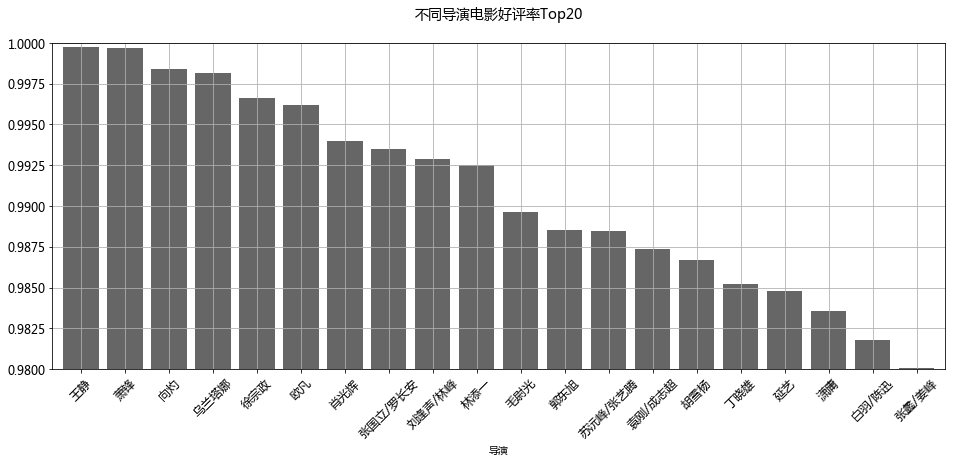

In [93]:
# 问题1 分析出不同导演电影的好评率，并筛选出TOP20

df_q1 = data_c.groupby('导演')[['评分人数','好评数']].sum()
df_q1['好评率'] = df_q1['好评数'] / df_q1['评分人数']
result_q1 = df_q1.sort_values('好评率',ascending = False)[:20]
result_q1
result_q1['好评率'].plot(kind = 'bar',
                     ylim = [0.98,1],
                     color = 'k',
                     width = 0.8,alpha = 0.6,
                     figsize = (16,6),
                    grid = True,rot = 45,fontsize = 12)
plt.title('不同导演电影好评率Top20\n',fontsize = 14)

         导演    上映年份   整理后剧名       评分人数        好评数
10      剧视电  2012.0   穿帮集中营   330961.0   255156.0
16  林清芳/王明台  2006.0  花样少年少女  2009262.0  1767514.0
19      表民洙  2015.0   浩9的爱情   172206.0   137782.0
20       未知  2007.0  命定之爱国语  1585560.0  1349494.0
21      陈国军  2000.0  末路1997   154403.0   115083.0


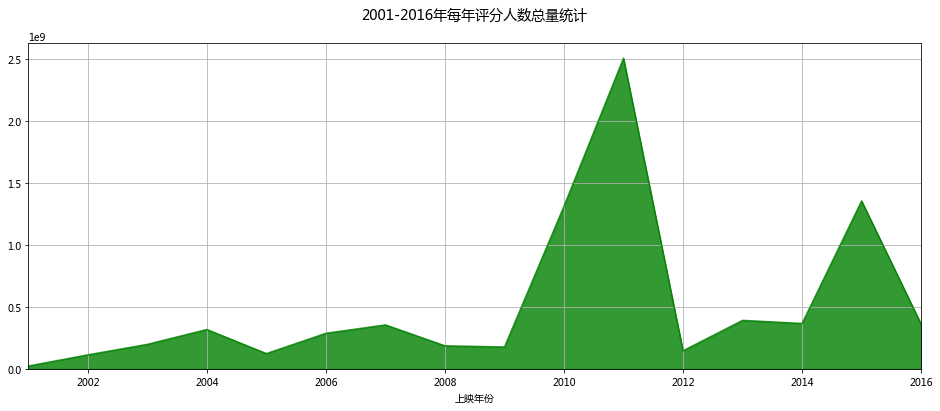

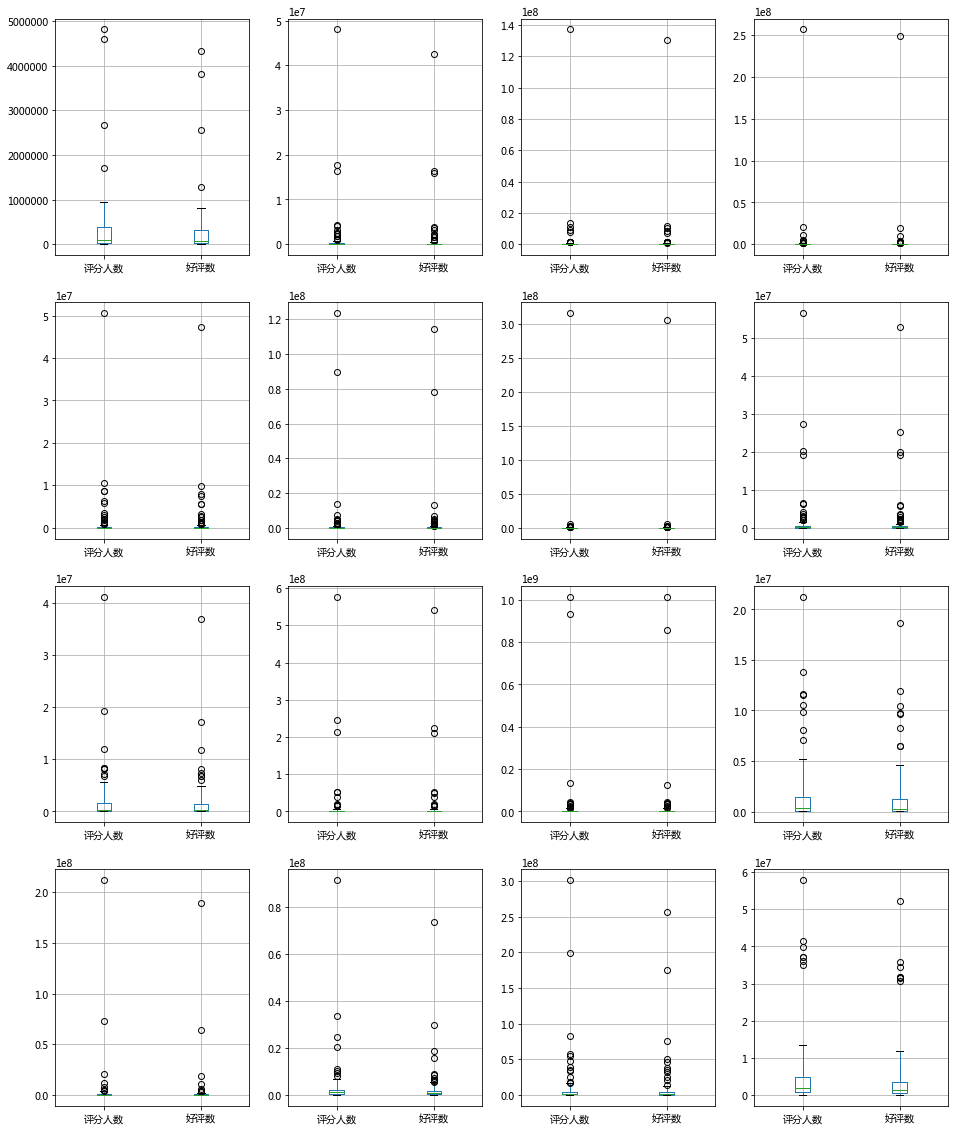

In [50]:
# 问题2 统计分析2001-2016年每年评影人数总量
# 要求：
# ① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
# ② 通过面积图，做图表可视化，分析每年人数总量变化规律
# ③ 验证是否有异常值（极度异常）
# ④ 创建函数分析出数据外限最大最小值）
# ⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
# 提示：
# ① 通过箱型图验证异常值情况
# ② 通过quantile(q=0.5)方法，得到四分位数
# ③ IQR=Q3-Q1
# ④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）

q2data1 = data_c[['导演','上映年份','整理后剧名']].drop_duplicates()
q2data1 = q2data1[q2data1['上映年份'] != 0]
q2data1 = q2data1[q2data1['导演'] != '缺失数据']
#print(q2data1.head())

q2data2 = data_c.groupby('整理后剧名').sum()[['评分人数','好评数']]
#print(q2data2.head())

q2data3 = pd.merge(q2data1,q2data2,left_on='整理后剧名',right_index=True)
print(q2data3.head())

q2data4 = q2data3.groupby('上映年份').sum()[['评分人数','好评数']]
q2data4['评分人数'].loc[2001:].plot.area(figsize = (16,6),grid = True,color = 'g',alpha = 0.8)
plt.title('2001-2016年每年评分人数总量统计\n',fontsize = 14)

fig,axes = plt.subplots(4,4,figsize = (16,20))
start = 2001
for i in range(4):
    for j in range(4):
        data = q2data3[q2data3['上映年份'] == start]
        data[['评分人数','好评数']].boxplot(whis = 3,return_type = 'dict',ax = axes[i,j])
        start += 1
# 发现基本每年的数据中都有异常值，且为极度异常

In [89]:
# 创建函数得到外限最大最小值
# 查看异常值

a = q2data3[q2data3['上映年份'] == 2001]
def data_error(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    tmax = q3 + 3*iqr
    tmin = q1 - 3*iqr
    return(tmax,tmin)

for i in range(2001,2017):
    data_year = q2data3[q2data3['上映年份'] == i]
    t = data_error(data_year,'评分人数')
    hot = data_year[data_year['评分人数'] > t[0]]
    print('%i年共有%i部影视剧,其中热门作品有%i部,分别是' %(i,len(data_year),len(hot)))
    print(hot['整理后剧名'].values,'\n')

2001年共有49部影视剧,其中热门作品有4部,分别是
['东北1家人' '黑冰' '少年包青天2' '康熙王朝'] 

2002年共有74部影视剧,其中热门作品有14部,分别是
['拿什么拯救你我的爱人' '少年张3丰' '大染坊' '乌龙闯情关' '白领公寓' '铁齿铜牙纪晓岚2' '康熙微服私访记4' '我的淘气天使'
 '东北1家人续集' '半生缘' '乾隆王朝' '无敌县令' '少年黄飞鸿' '大汉天子'] 

2003年共有97部影视剧,其中热门作品有11部,分别是
['18岁的天空' '玉观音' '布衣天子' '火帅' '重案6组2' '倚天屠龙记' '少年康熙' '双响炮' '风流少年唐伯虎' '隋唐英雄传'
 '萍踪侠影'] 

2004年共有106部影视剧,其中热门作品有10部,分别是
['血色浪漫' '1米阳光' '我非英雄' '铁齿铜牙纪晓岚3' '神探狄仁杰' '平淡生活' '天龙8部' '小兵张嘎' '谍战之特殊较量'
 '大汉天子2'] 

2005年共有123部影视剧,其中热门作品有16部,分别是
['大宋提刑官' '秦王李世民传奇' '地下交通站' '刀锋1937' '小鱼儿与花无缺' '少年嘉庆' '刁蛮公主' '天下第1' '风云2'
 '少年天子之顺治王朝' '恶作剧之吻' '午夜阳光' '我爱河东狮' '汉武大帝' '后天美女' '绿光森林'] 

2006年共有119部影视剧,其中热门作品有15部,分别是
['花样少年少女' '狼毒花' '薛仁贵传奇' '会有天使替我爱你' '济公新传' '楚留香传奇' '亮剑' '地下铁' '神探狄仁杰2'
 '爱了散了' '士兵突击' '女人不哭' '精卫填海' '少年包青天3' '神雕侠侣'] 

2007年共有107部影视剧,其中热门作品有9部,分别是
['命定之爱国语' '梁山伯与祝英台' '我们生活的年代' '王昭君' '妈妈再爱我1次' '爱是1颗幸福的子弹' '炊事班的故事3' '终极1家'
 '梅艳芳菲'] 

2008年共有128部影视剧,其中热门作品有14部,分别是
['剑谍' '空巷子' '5星大饭店' '1千滴眼泪' '红日' '闯关东' '魔幻手机' '敌营18年' '神探狄仁杰3' '少林僧兵' '暖春'
 '新包青天' '宁为女人' '10大奇冤'] 

2